In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import csv
import tensorflow as tf
import numpy as np
import pandas as pd
import io
import itertools
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from string import punctuation
from sklearn.model_selection import train_test_split

STOPWORDS = set(stopwords.words('english') + list(punctuation))


In [ ]:
# Parâmetros Principais

# Tamanho do vocabulário a ser criado com o tokenizer. Este considera as N palavras mais comuns (ou frequentes nos textos)
vocab_size = 10000 # 5000 / 10000

# Tamanho do vetor de características que representa cada palavra. Cada palavra é transformada para um vetor com 64 entradas.
embedding_dim = 256  # 64 / 256

# Tamanho máximo da sequência de códigos que representa um texto (tamanho do feature vector)
max_length = 20  # 15 / 25

# Tipo de truncagem a ser utilizado, 'post' significa remover valores do final da sequência.
trunc_type = 'post'

# Tipo de padding a ser utilizado, 'post' significa completar no final da sequência.
padding_type = 'post'

# Token a ser utilizado quando uma palavra não presente no vocabulário é encontrada no texto
Not_known = '<NKN>'

# Porcentagem de instâncias a ser utilizada no treinamento
training_portion = .8

In [ ]:

# Load your CSV file
df = pd.read_csv('tweet_emotions.csv')

def clean_tweet(tweet):
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    return tweet

df['content'] = df['content'].apply(clean_tweet)
unique_sentiments = df['sentiment'].unique()
df.to_csv('cleaned_tweet_emotions.csv', index=False)

print(df)
print(unique_sentiments)

         tweet_id   sentiment  \
0      1956967341       empty   
1      1956967666     sadness   
2      1956967696     sadness   
3      1956967789  enthusiasm   
4      1956968416     neutral   
...           ...         ...   
39995  1753918954     neutral   
39996  1753919001        love   
39997  1753919005        love   
39998  1753919043   happiness   
39999  1753919049        love   

                                                 content  
0       i know  i was listenin to bad habit earlier a...  
1      Layin n bed with a headache  ughhhh...waitin o...  
2                    Funeral ceremony...gloomy friday...  
3                   wants to hang out with friends SOON!  
4       We want to trade with someone who has Houston...  
...                                                  ...  
39995                                                     
39996                     Happy Mothers Day  All my love  
39997  Happy Mother's Day to all the mommies out ther...  
39998   WASSU

In [ ]:
# Carrega os textos. Em X o texto de entrada e em y os rótulos.
# Cada linha do texto carregada é filtrada para retirada de stopwords.

def read(file):
    with open(file, 'r', encoding='UTF-8') as csvfile:
        texto = csv.reader(csvfile, delimiter=',')      # read text file
        print(texto)
        next(texto)
        for linha in texto:       # process each line of text
            y.append(linha[1])
            aux = linha[2]
            for word in STOPWORDS:        # stopwords removal
                token = ' ' + word + ' '
                aux = aux.replace(token, ' ')
                aux = aux.replace(' ', ' ')
            X.append(aux)
X = []
y = []
read('cleaned_tweet_emotions.csv')

print(len(y))       # number of labels
print(len(X))       # number of text

dic = {'neutral':'positive', 'enthusiasm':'positive', 'surprise':'positive',\
       'love':'positive','fun':'positive', 'happiness':'positive',\
       'relief':'positive',  'sadness':'negative','worry':'negative',\
       'hate':'negative', 'boredom':'negative', 'anger':'negative', 'empty':'negative',}
y=[dic.get(n, n) for n in y]

print(y)

train_X, validation_X, train_y, validation_y = train_test_split(X,y,test_size=.3, random_state=42, stratify=y)
print(train_y)
print(validation_y)
print(len(train_y))
print(len(validation_y))
print(set(y))


40000
40000
['negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'positive', 'positive', 'negative', 'negative', 'negative', 'positive', 'ne

In [ ]:
# Creates a vocabulary for the training data considering the size set at vocab_size.
# Not_known represents the token for words not in the vocabulary
tokenizer = Tokenizer(num_words = vocab_size, oov_token=Not_known)
tokenizer.fit_on_texts(train_X)
word_index = tokenizer.word_index
tokenizer.num_words

10000

In [ ]:
# Lists N words from the vocabulary, the most frequent
N=1000
dict(list(word_index.items())[1:N])


{'i': 2,
 "i'm": 3,
 'day': 4,
 'good': 5,
 'get': 6,
 'it': 7,
 'like': 8,
 'you': 9,
 'quot': 10,
 'go': 11,
 'today': 12,
 'got': 13,
 'love': 14,
 'work': 15,
 'going': 16,
 'happy': 17,
 'lol': 18,
 'one': 19,
 'me': 20,
 'time': 21,
 'back': 22,
 'know': 23,
 'really': 24,
 'im': 25,
 'u': 26,
 'now': 27,
 'see': 28,
 'amp': 29,
 "can't": 30,
 'my': 31,
 'new': 32,
 'night': 33,
 'just': 34,
 'home': 35,
 'think': 36,
 'is': 37,
 'thanks': 38,
 '2': 39,
 'well': 40,
 'want': 41,
 'the': 42,
 'oh': 43,
 'still': 44,
 'much': 45,
 'miss': 46,
 'need': 47,
 'last': 48,
 'hope': 49,
 'great': 50,
 'morning': 51,
 'so': 52,
 'haha': 53,
 'too': 54,
 'twitter': 55,
 'feel': 56,
 'no': 57,
 'fun': 58,
 'that': 59,
 'would': 60,
 'wish': 61,
 'tomorrow': 62,
 'and': 63,
 'sad': 64,
 'but': 65,
 '3': 66,
 'sorry': 67,
 'right': 68,
 'tonight': 69,
 'bad': 70,
 "it's": 71,
 "i'll": 72,
 'up': 73,
 'make': 74,
 'though': 75,
 'better': 76,
 'nice': 77,
 "that's": 78,
 'yeah': 79,
 'sleep': 

In [ ]:
# Converte uma linha de texto em uma sequência de valores
train_sequences = tokenizer.texts_to_sequences(train_X)

In [ ]:
# Mostra uma linha de texto convertida para sequência de valores
# Cada valor representa uma palavra do vocabulário
print(train_X[5])
print(train_sequences[5])

 sigh. come Sac please. Miami central valley.
[631, 89, 5555, 124, 2180, 2065, 2659]


In [ ]:
# Transforma todas as sequências para um tamanho fixo. Sequências pequenas são completadas e sequências maiores que o limite são truncadas
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

2
20
16
20
15
20


In [ ]:
# prints a sequence
print(train_sequences[6])
print(train_padded[6])

[25, 1550, 90, 261, 6, 76, 631]
[  25 1550   90  261    6   76  631    0    0    0    0    0    0    0
    0    0    0    0    0    0]


In [ ]:
# Tokenize validation dataset

validation_sequences = tokenizer.texts_to_sequences(validation_X)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

12000
(12000, 20)


In [ ]:
# Show labels
print(set(y))

{'positive', 'negative'}


In [ ]:
# Tokenize labels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(y)

label_index = label_tokenizer.word_index
print(label_index)
#dict(list(label_index.items())[1:5])

# -1 to start on 0
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_y))-1
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_y))-1

{'positive': 1, 'negative': 2}


In [ ]:
print(training_label_seq[2])
print(train_sequences[2])
print(train_X[2])
print(training_label_seq[1])
print(training_label_seq[400])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[50])
print(validation_label_seq.shape)

[1]
[178, 7096, 338, 49, 239, 275]
its sprinkling outside  hope rain game ..
[1]
[0]
(28000, 1)
[1]
[0]
[0]
(12000, 1)


In [ ]:
# Confere como ficaram as nossas frases depois de transformdas
# Apenas para conferência.

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[50]))
print('---')
print(train_X[50])
print(train_y[50])

i miss you come michigan like now i can't wait till july ? ? ? ? ? ? ? ?
---
 I miss you!  Come Michigan like now....I can't wait till July
negative


In [ ]:

# Creating the LSTM (Long Short Term Memory) network

hidden_size=64
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, embedding_dim))
model.add(tf.keras.layers.LSTM(embedding_dim, dropout = 0.25 , return_sequences=True))
model.add(tf.keras.layers.LSTM(embedding_dim, dropout = 0.25))
#model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)))
model.add(tf.keras.layers.Dense(hidden_size, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='softmax'))

# Compiling LSTM
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training LSTM
num_epochs = 20
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

model.summary()

Epoch 1/20
875/875 - 23s - loss: 0.5975 - accuracy: 0.4016 - val_loss: 0.5617 - val_accuracy: 0.4016 - 23s/epoch - 26ms/step
Epoch 2/20
875/875 - 7s - loss: 0.5094 - accuracy: 0.4016 - val_loss: 0.5836 - val_accuracy: 0.4016 - 7s/epoch - 8ms/step
Epoch 3/20
875/875 - 8s - loss: 0.4506 - accuracy: 0.4016 - val_loss: 0.5889 - val_accuracy: 0.4016 - 8s/epoch - 10ms/step
Epoch 4/20
875/875 - 6s - loss: 0.3897 - accuracy: 0.4016 - val_loss: 0.6800 - val_accuracy: 0.4016 - 6s/epoch - 7ms/step
Epoch 5/20
875/875 - 7s - loss: 0.3303 - accuracy: 0.4016 - val_loss: 0.7396 - val_accuracy: 0.4016 - 7s/epoch - 8ms/step
Epoch 6/20
875/875 - 6s - loss: 0.2729 - accuracy: 0.4016 - val_loss: 0.8795 - val_accuracy: 0.4016 - 6s/epoch - 7ms/step
Epoch 7/20
875/875 - 7s - loss: 0.2253 - accuracy: 0.4016 - val_loss: 0.9981 - val_accuracy: 0.4016 - 7s/epoch - 8ms/step
Epoch 8/20
875/875 - 6s - loss: 0.1893 - accuracy: 0.4016 - val_loss: 1.1597 - val_accuracy: 0.4016 - 6s/epoch - 7ms/step
Epoch 9/20
875/875 -

In [ ]:
# Testing a phrase LSTM

txt = ["i cut myself by mistake, im bleeding"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = model.predict(padded)
labels = ['positive', 'negative']
print(pred, labels[np.argmax(pred)])

print("Result on validation:")
score=model.evaluate(validation_padded, validation_label_seq, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



1/1 [==============================] - 1s 754ms/step
[[1.]] positive
Result on validation:
Test loss: 1.8298321962356567
Test accuracy: 0.40158334374427795


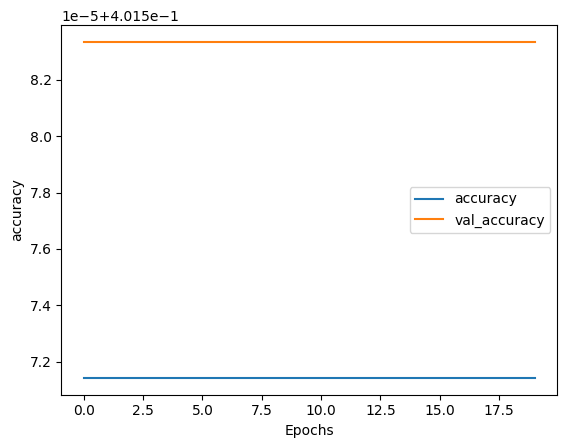

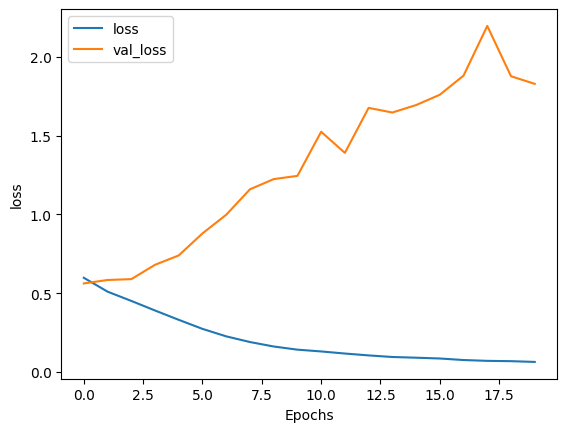

In [ ]:
# Plots training history

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
# Creating a RNN (Recurrent Neural Network)

modelrnn = tf.keras.Sequential()
modelrnn.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
modelrnn.add(tf.keras.layers.SimpleRNN(units=64))
modelrnn.add(tf.keras.layers.Dense(64, activation='relu'))
modelrnn.add(tf.keras.layers.Dense(64, activation='relu'))
modelrnn.add(tf.keras.layers.Dense(2, activation='softmax'))
modelrnn.summary()

# Compiling RNN
#modelrnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
modelrnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training RNN
historyrnn = model.fit(train_padded, training_label_seq, batch_size=32, epochs=20, validation_data=(validation_padded, validation_label_seq), verbose=2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 64)            640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 656706 (2.51 MB)
Trainable params: 656706 (2.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
875/875

In [ ]:
# Testting a phrase RNN

txt = ["i cut myself by mistake, im bleeding"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred = modelrnn.predict(padded)
labels = ['positive', 'negative']
print(pred, labels[np.argmax(pred)])

print("Result on validation:")
score=modelrnn.evaluate(validation_padded, validation_label_seq, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



1/1 [==============================] - 0s 207ms/step
[[0.49287754 0.5071224 ]] negative
Result on validation:
Test loss: 0.6980118751525879
Test accuracy: 0.44225001335144043


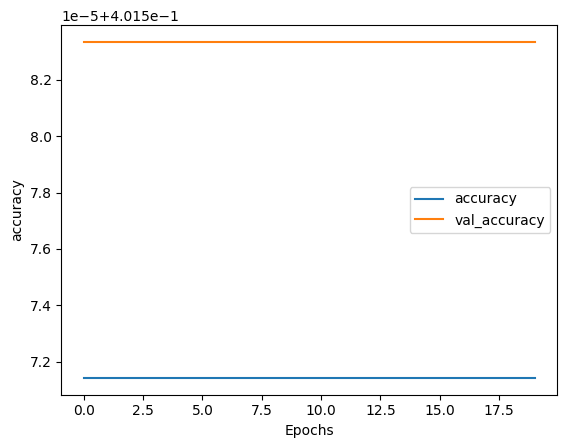

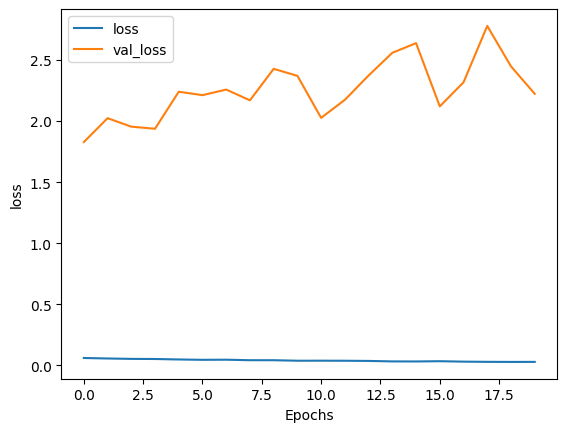

In [ ]:
# Imprime gráfico histórico do treinamento

def plot_graphs(history, string):
  plt.plot(historyrnn.history[string])
  plt.plot(historyrnn.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(historyrnn, "accuracy")
plot_graphs(historyrnn, "loss")


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")

  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

375/375 [==============================] - 1s 3ms/step
Confusion matrix, without normalization


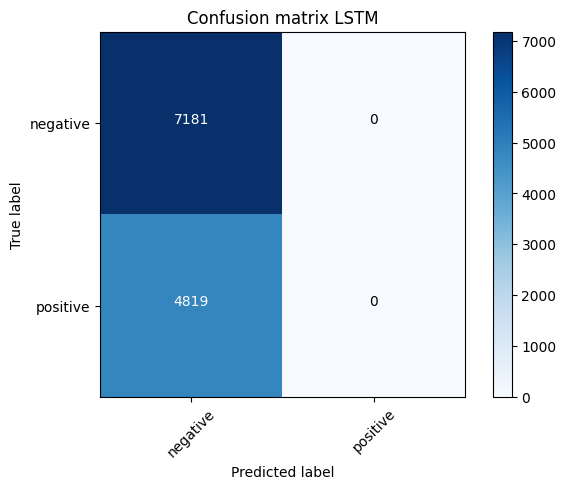

In [ ]:
# Plotting a Confusion Matrix

y_predict=model.predict(validation_padded)

class_predicted = np.argmax(y_predict, axis=1)

val=validation_label_seq.reshape(len(validation_label_seq))
cm=confusion_matrix(val, class_predicted)
cm_plot_labels=['negative', 'positive']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix LSTM')


375/375 [==============================] - 1s 3ms/step
Confusion matrix, without normalization


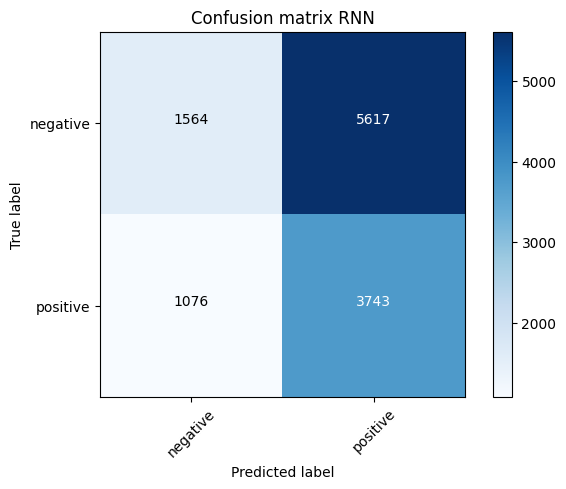

In [ ]:
# Preparar Matriz de Confusão

y_predict=modelrnn.predict(validation_padded)

class_predicted = np.argmax(y_predict, axis=1)

val=validation_label_seq.reshape(len(validation_label_seq))
cm=confusion_matrix(val, class_predicted)
cm_plot_labels=['negative', 'positive']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion matrix RNN')

In [ ]:
# Recuperando os embeddings
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # formato: (vocab_size, embedding_dim)

(10000, 256)


In [ ]:
# Salvando os embeddings



out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for num, word in zip(range(0,vocab_size), word_index):
  out_m.write(word + "\n")
  vec = weights[num]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")


out_v.close()
out_m.close()


In [ ]:
# Baixando na sua máquina

try:
  from google.colab import files
except ImportError:
   pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#link do Projector
http://projector.tensorflow.org/?hl=pt

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')